# 주제 : 새로 출시된 게임, 전문가 리뷰 믿고 바로 구매해도 될까요? 직접 데이터로 분석하고 판단해 보자!
----------

## 실습 가이드
    1. 데이터를 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Video Game Sales with Ratings을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    Video_Games_Sales_as_at_22_Dec_2016.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    Name: 게임의 이름
    Platform: 게임이 동작하는 콘솔
    Year_of_Release: 발매 년도
    Genre: 게임의 장르
    Publisher: 게임의 유통사
    NA_Sales: 북미 판매량 (Millions)
    EU_Sales: 유럽 연합 판매량 (Millions)
    JP_Sales: 일본 판매량 (Millions)
    Other_Sales: 기타 판매량 (아프리카, 일본 제외 아시아, 호주, EU 제외 유럽, 남미) (Millions)
    Global_Sales: 전국 판매량
    Critic_Score: Metacritic 스태프 점수
    Critic_Count: Critic_Score에 사용된 점수의 수
    User_Score: Metacritic 구독자의 점수
    User_Count: User_Score에 사용된 점수의 수
    Developer: 게임의 개발사
    Rating: ESRB 등급 (19+, 17+, 등등)

    
- 데이터 출처: https://www.kaggle.com/rush4ratio/video-game-sales-with-ratings

## 최종 목표
    - 흥미로운 일상적인 데이터 분석해 보기
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해

---

## Step 1. 데이터셋 준비하기

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [2]:
df = pd.read_csv('Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
df.shape

(16719, 16)

In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16718,Winning Post 8 2016,PSV,2016.0,Simulation,Tecmo Koei,0.00,0.00,0.01,0.0,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 결손 데이터 데이터프레임에서 제거하기


In [7]:
# dropna() 메소드를 이용하여 결손 데이터가 포함된 row를 제거
# na확인
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [13]:
#dropna로 결측치 지우기
df.dropna(inplace=True)

In [14]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [15]:
df.shape

(6825, 16)

### 문제 5. 수치형 데이터의 히스토그램 확인하기


In [9]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

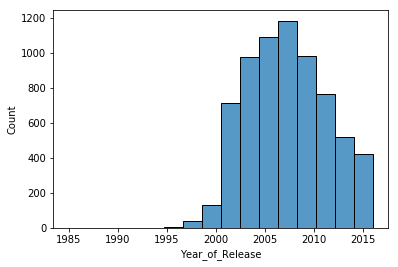

In [16]:
# Seaborn의 histplot()을 이용하여 히스토그램 확인
# 값의 범위가 넓어 히스토그램 분석이 어려울 경우, 아웃라이어를 제거하면서 히스토그램 확인sns.his
sns.histplot(x='Year_of_Release', data=df, bins=16)

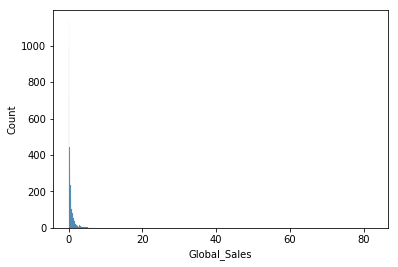

In [18]:
sns.histplot(x='Global_Sales', data=df)

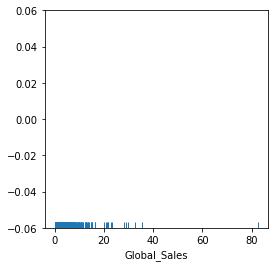

In [22]:
plt.figure(figsize=[4,4])
sns.rugplot(x='Global_Sales', data=df)

In [23]:
#3건뿐인 것 확인 -> 조치를 할 수도 있고 냅둘 수도 있음
df[df['Global_Sales']>30]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E


In [24]:
#최대한 가져오는데 너무 떨어진 것만 제외
gs = df['Global_Sales'].quantile(0.99)

In [25]:
df = df[df['Global_Sales'] < gs]

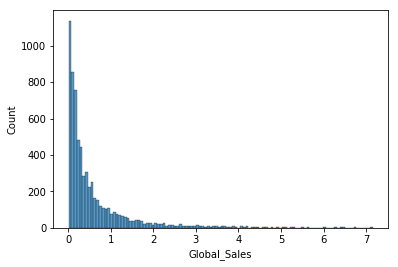

In [27]:
#그래프가 좀 더 보기 쉬워짐
sns.histplot(x='Global_Sales', data = df)

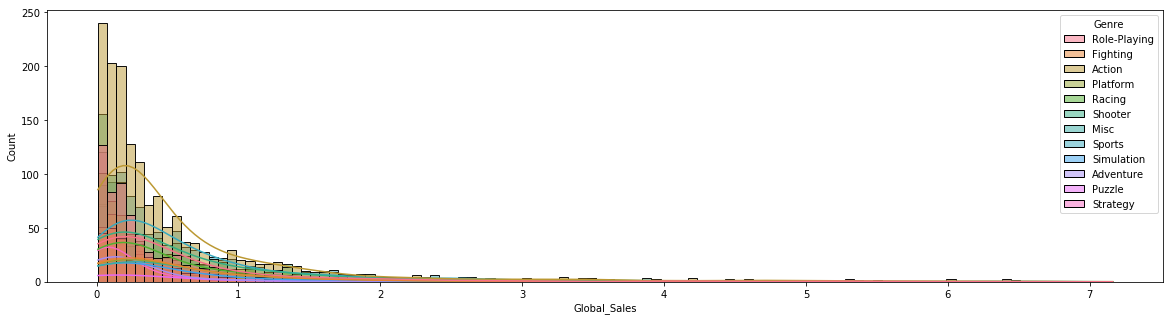

In [30]:
#hue = 카테고리별 색상 다르게 / kde = 커널 밀도
fig = plt.figure(figsize=(20,5))
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data = df)

### 문제 6. 수치형 데이터와 전국 판매량의 Jointplot 분석하기

In [31]:
# 수치형 데이터와 전국 판매량의 관계를 Seaborn의 jointplot()으로 시각화/분석
df['Use_Score'] = df['User_Score'].apply(float)

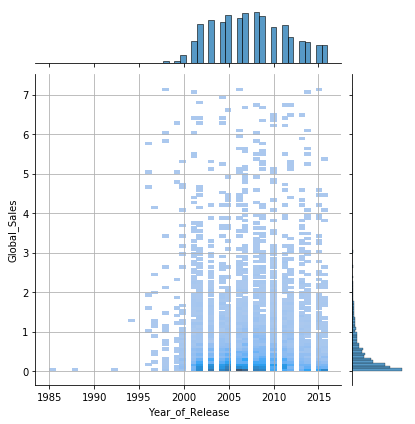

In [32]:
#도메인 전문가와 상의하되 전문가가 쳐내란대로 쳐내면 현재 데이터에 특화된 모델이 나올 수 있음
#분석가가 고민하고 신경써야 됨
sns.jointplot(x='Year_of_Release',y='Global_Sales', data = df, kind='hist')

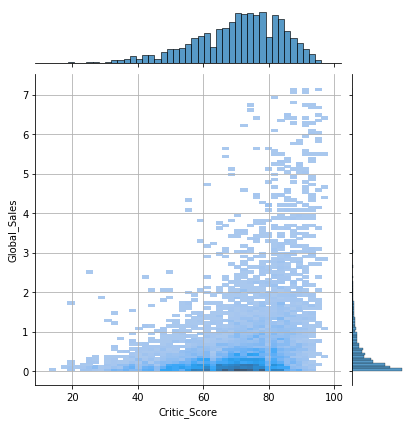

In [33]:
#jointplot = scatter + 각 축별 히스토그램
sns.jointplot(x='Critic_Score',y='Global_Sales', data = df, kind='hist')

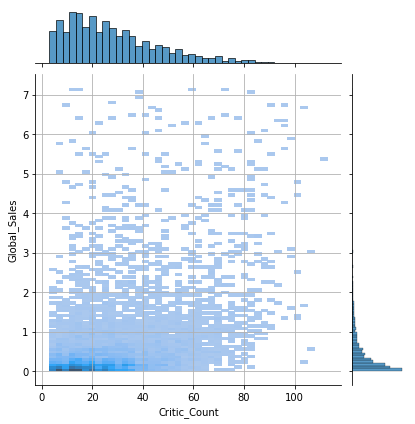

In [35]:
#판매량과 연관성 애매함 확인
sns.jointplot(x='Critic_Count',y='Global_Sales', data = df, kind='hist')

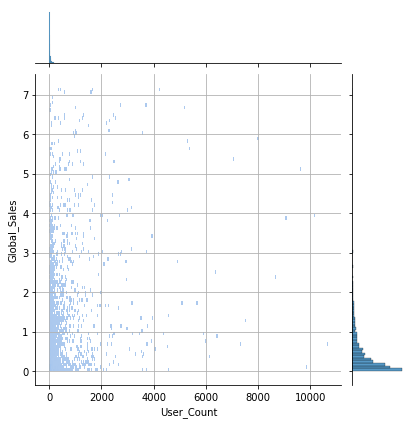

In [36]:
#판매량과 연관성 떨어짐 확인
sns.jointplot(x='User_Count',y='Global_Sales', data = df, kind='hist')

### 문제 7. 범주형 데이터의 범주별 전국 판매량의 Boxplot 분석하기

In [40]:
# 범주형 데이터별 전국 판매량의 Boxplot 시각화/분석
df.columns 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating',
       'Use_Score'],
      dtype='object')

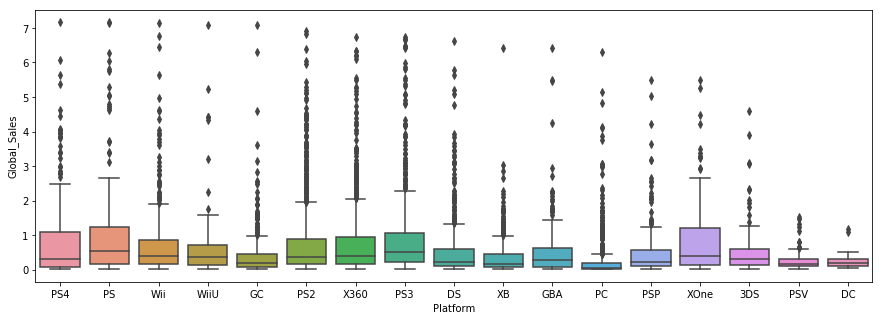

In [41]:
#콘솔별 위로는 이상치 많은 것 확인 
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Platform', y='Global_Sales', data = df)

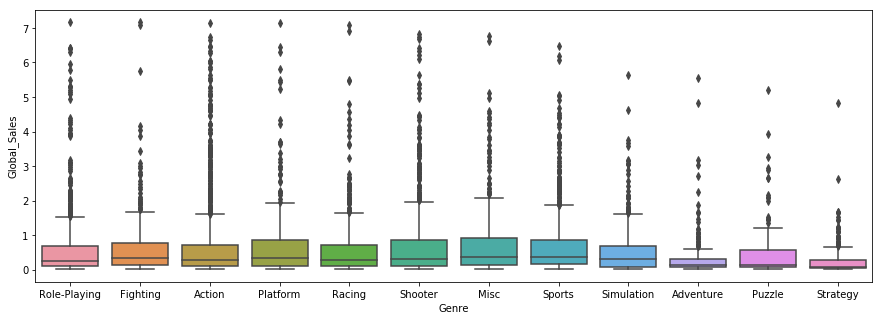

In [42]:
#장르별로는 골고루 인기 좋은 것 확인
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Genre', y='Global_Sales', data = df)

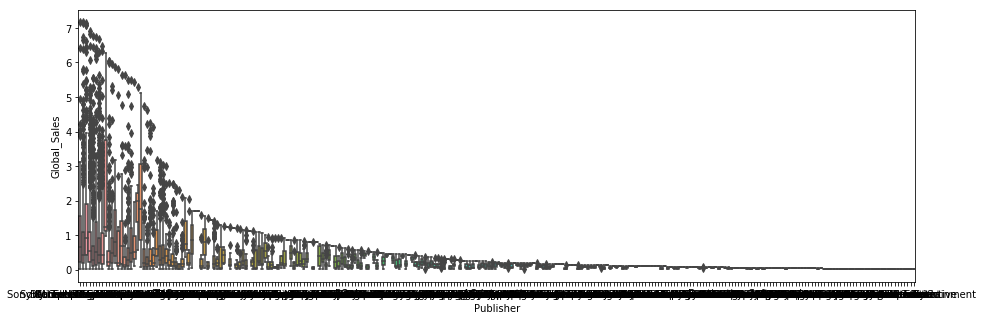

In [43]:
#유통사별 판매량
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Publisher', y='Global_Sales', data = df)

#### -> 수치형 데이터 = 히스토그램 / 범주형 데이터 = boxplot 사용

### 문제 8. 전문가 평점과 사용자 평점의 차이 분석하기

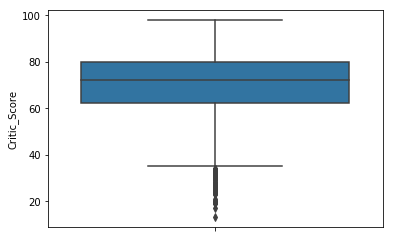

In [45]:
# Seaborn 시각화로 전문가 평점과 사용자 평점의 통계 비교/분석하기
# Hint) 두 값의 범위가 다르므로, 범위를 동일하게 맞추어 비교
# Tip) 별도의 DataFrame을 구성하여 boxplot으로 비교하면 편리함
sns.boxplot(y='Critic_Score', data=df)

In [46]:
#copy를 해와야 독립적으로 가져옴 / hard copy, soft copy 차이
critic_score = df[['Critic_Score']].copy()

In [47]:
critic_score.rename({'Critic_Score':'Score'}, axis=1, inplace=True)
critic_score['ScoreBy'] = 'Critics'

In [63]:
user_score = df[['User_Score']].copy()
user_score.rename({'User_Score':'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [64]:
critic_score

,Score,ScoreBy
105,87.0,Critics
106,96.0,Critics
107,95.0,Critics
109,91.0,Critics
110,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [67]:
user_score

,Score,ScoreBy
105,6.5,Users
106,9.1,Users
107,9,Users
109,8.9,Users
110,9.1,Users
...,...,...
16667,2.4,Users
16677,8.8,Users
16696,7.6,Users
16700,5.8,Users


In [68]:
scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
105,87,Critics
106,96,Critics
107,95,Critics
109,91,Critics
110,88,Critics
...,...,...
16667,2.4,Users
16677,8.8,Users
16696,7.6,Users
16700,5.8,Users


### 문제 9. 수치형 데이터간의 상관성 시각화하기

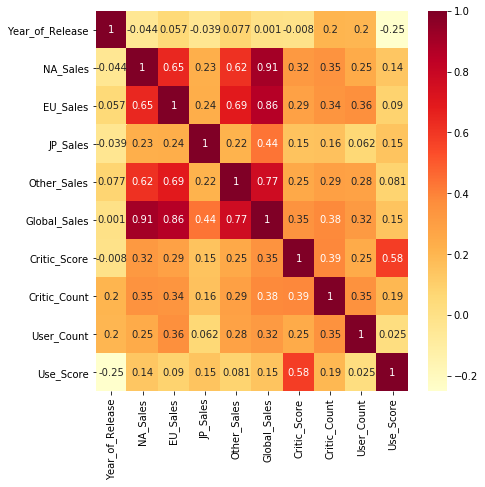

In [69]:
# Correlation Heatmap 시각화하기
fig = plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True, cmap = 'YlOrRd')
#다중공선성 확인

## Step 3. 모델 학습을 위한 데이터 전처리 

### 문제 10. 범주형 데이터에서 소수 범주를 others로 대체하기

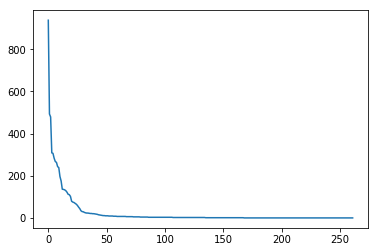

In [74]:
# 범주형 데이터 중 범주가 너무 적은 경우 others 범주로 대체하기
# Hint) value_counts()를 이용하여 범주별 개수를 확인
pb = df['Publisher'].value_counts()
plt.plot(range(len(pb)), pb)

In [75]:
#pb 20 이후로는 others로 묶어버림
df['Publisher'] = df['Publisher'].apply(lambda s:s if s not in pb[20:] else 'others')

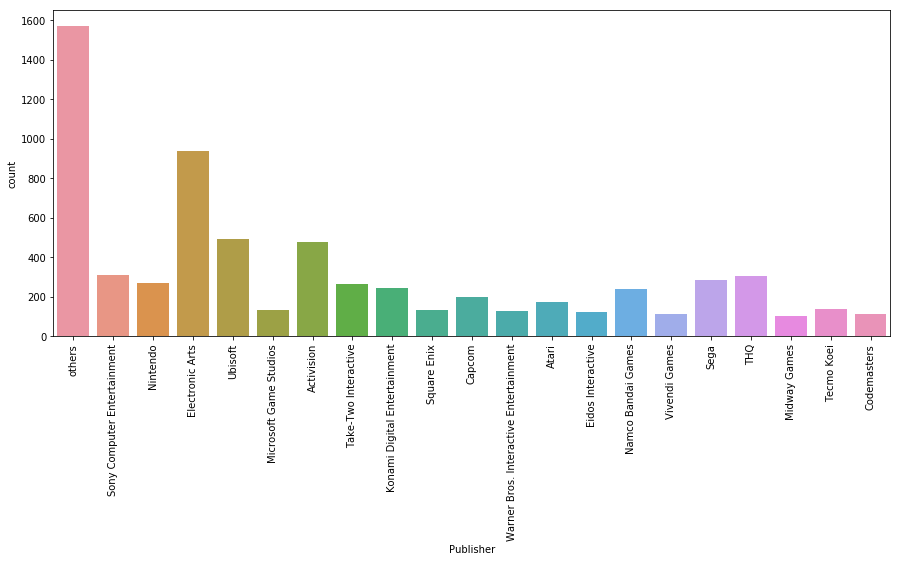

In [78]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x='Publisher', data=df)
plt.xticks(rotation=90)
plt.show()

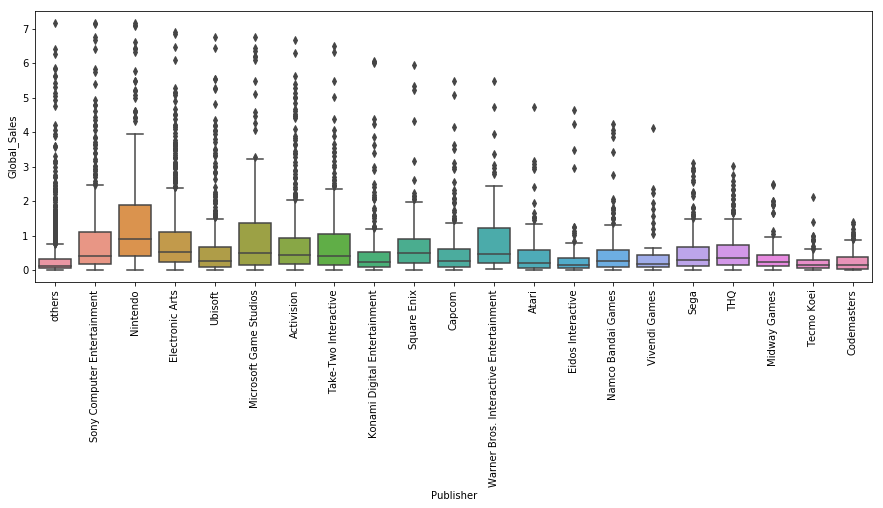

In [79]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Publisher', y='Global_Sales', data = df)
plt.xticks(rotation=90)
plt.show()

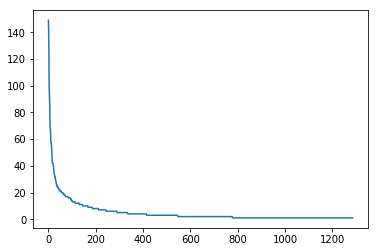

In [81]:
dev = df['Developer'].value_counts()
plt.plot(range(len(dev)), dev)

In [83]:
df['Developer'] = df['Developer'].apply(lambda s: s if s not in dev[20:] else 'others')

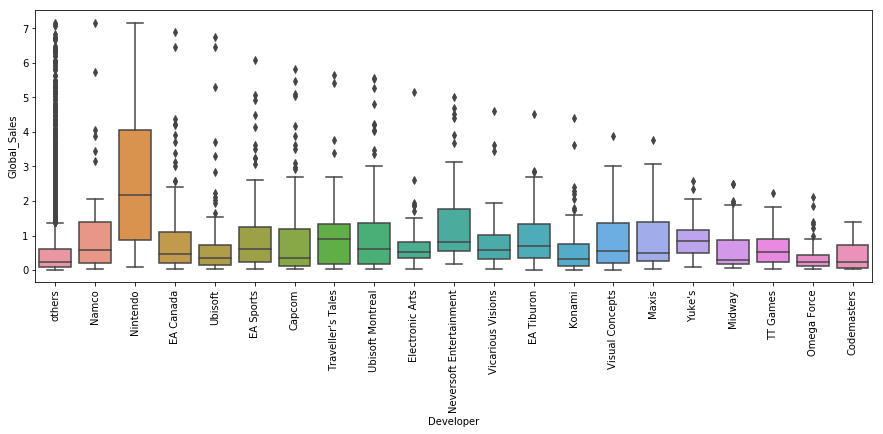

In [84]:
fig = plt.figure(figsize=(15,5))
sns.boxplot(x='Developer', y='Global_Sales', data = df)
plt.xticks(rotation=90)
plt.show()

### 문제 11. get_dummies를 이용한 범주형 데이터 전처리


In [85]:
#장르, 출판사, 플랫폼만 확인해보기
X_cat = df[['Platform', 'Genre', 'Publisher']]
X_cat = pd.get_dummies(X_cat, drop_first=True)

In [86]:
#순서형 데이터 -> 라벨
X_cat

,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PS4,Platform_PSP,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
105,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
106,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
110,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16667,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
16677,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16696,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16700,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Step 4. 전국 판매량 Regression 모델 학습하기

### 문제 12. 전국 판매량 추정을 위한 입출력 데이터 구성하기


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [90]:
# 전국 판매량 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화
X_num = df[['Year_of_Release', 'Critic_Score', 'Critic_Count']]
scaler = StandardScaler()
#fit과 transform에 넣는 데이터가 같아야 함
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
#return되는 타입을 df로 바꿔줌
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns = X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['Global_Sales']

In [94]:
X.head()

,Year_of_Release,Critic_Score,Critic_Count,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,Platform_PS2,...,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Square Enix,Publisher_THQ,Publisher_Take-Two Interactive,Publisher_Tecmo Koei,Publisher_Ubisoft,Publisher_Vivendi Games,Publisher_Warner Bros. Interactive Entertainment,Publisher_others
105,1.797863,1.222094,1.548409,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
106,-2.239604,1.873578,-0.719392,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
107,-0.339619,1.801190,2.339502,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
109,-2.239604,1.511642,-0.877611,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
110,1.560365,1.294481,2.814158,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
#random_state 값은 아무거나 넣어도 됨 -> 분업할 때 팀원끼리 맞추는 것 중요
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

-> 실무에선 3~5개 모델을 뽑아서 비교해보고 리서치를 통해 해당 데이터에 맞는 모델을 선정하는게 좋음

### 문제 13. XGBoost 모델 생성/학습하기

In [97]:
from xgboost import XGBRegressor

In [98]:
# XGBRegressor 모델 생성/학습
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=8, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

### 문제 14. Linear Regression 모델 생성/학습하기

In [99]:
from sklearn.linear_model import LinearRegression

In [100]:
# LinearRegression 모델 생성/학습
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### 문제 15. 모델 학습 결과 평가하기

In [105]:
# MAE, MSE, RMSE 확인
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [106]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = model_xgb.predict(X_test)
pred_lr = model_lr.predict(X_test)

In [108]:

print('XGB MAE : ', mean_absolute_error(y_test, pred_xgb))
print('XGB RMSE : ', sqrt(mean_squared_error(y_test, pred_xgb)))

print('lr MAE : ', mean_absolute_error(y_test, pred_lr))
print('lr RMSE : ', sqrt(mean_squared_error(y_test, pred_lr)))

XGB MAE :  0.4400639031240997
XGB RMSE :  0.7531845432793302
lr MAE :  0.5051887942264967
lr RMSE :  0.7640747686370057


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


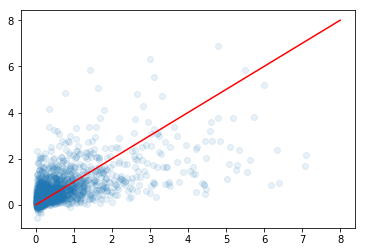

In [110]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
plt.scatter(y_test, pred_xgb, alpha=0.1)
# 이상적인 추세선 그려서 scatter가 선과 비슷하면 좋은건데 그렇지 않음 확인
plt.plot([0,8],[0,8], '-r')

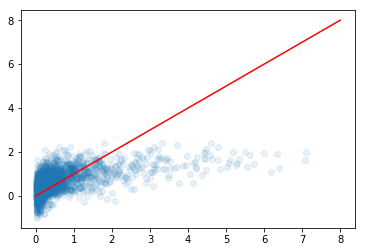

In [111]:
plt.scatter(y_test, pred_lr, alpha=0.1)
plt.plot([0,8],[0,8], '-r')

In [ ]:
-> 비교결과 xgb가 그나마 낫다고 볼 수 있음

### 문제 17. XGBoost 모델의 Feature Importance 시각화하기

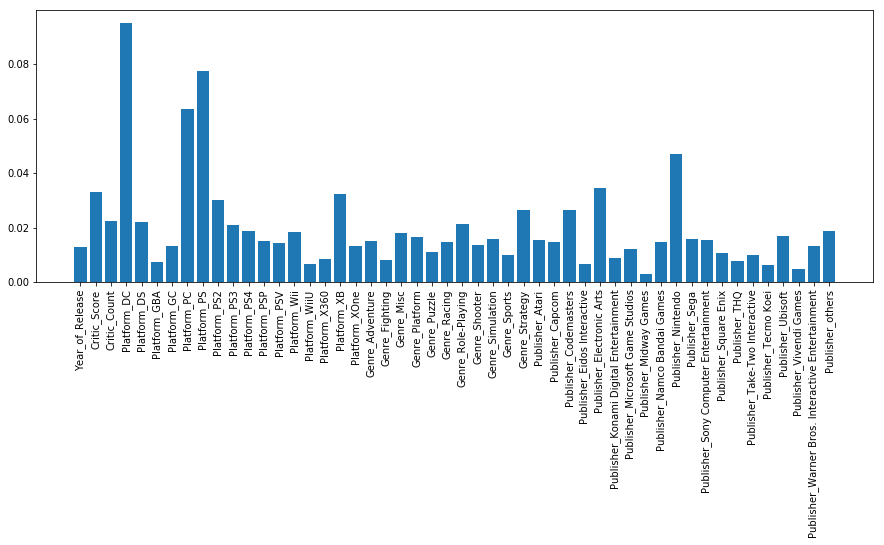

In [114]:
#어떤 변수가 더 깊은 관계가 있는가
fig =plt.figure(figsize=(15,5))
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

In [ ]:
-> 확인 후 오차범위를 줄이려면 관련이 낮은 변수 빼고 해볼 수도 있음

## Step 5. 유저 평점 Regression 모델 학습하기

### 문제 18. 유저 평점 추정을 위한 입출력 데이터 구성하기


In [ ]:
# 유저 평점 추정을 위해 적절한 입력과 출력 컬럼 선정
# 수치형 데이터는 StandardScaler를 이용해 표준화

scaler = 
X = 
y = 




In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 





### 문제 19. XGBoost 모델 생성/학습하기

In [ ]:
# XGBRegressor 모델 생성/학습
model_xgb = 




### 문제 20. Linear Regression 모델 생성/학습하기

In [ ]:
# LinearRegression 모델 생성/학습
model_lr = 




### 문제 21. 모델 학습 결과 평가하기

In [ ]:
# Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기
pred_xgb = 
pred_lr = 





### 문제 22. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기






### 문제 23. XGBoost 모델의 Feature Importance 시각화하기